<a href="https://colab.research.google.com/github/Shah12345678901/Object_detection_using_pytorch_fasterRCNN./blob/main/Object_detection_using_pytorch_fasterRCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


**Getting the data**

In [5]:
!wget "https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/9rcv8mm682-1.zip" -p "/content/drive/MyDrive/Colab Notebooks/Eternal Robtics Computer Vison Assignment"

--2022-07-03 05:16:42--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/9rcv8mm682-1.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.84.115
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.84.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1315613485 (1.2G) [application/octet-stream]
Saving to: ‘md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/9rcv8mm682-1.zip’

md-datasets-cache-z 100%[===================>]   1.22G  29.7MB/s    in 43s     

2022-07-03 05:17:25 (29.2 MB/s) - ‘md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/9rcv8mm682-1.zip’ saved [1315613485/1315613485]

/content/drive/MyDrive/Colab Notebooks/Eternal Robtics Computer Vison Assignment: Scheme missing.
FINISHED --2022-07-03 05:17:25--
Total wall clock time: 44s
Downl

In [6]:
%cd /content/md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com
!unzip 9rcv8mm682-1.zip

Streaming output truncated to the last 5000 lines.
  inflating: Safety Helmet Wearing Dataset/Annotations/hard_hat_workers1144.xml  
  inflating: Safety Helmet Wearing Dataset/Annotations/hard_hat_workers910.xml  
  inflating: Safety Helmet Wearing Dataset/Annotations/hard_hat_workers2035.xml  
  inflating: Safety Helmet Wearing Dataset/Annotations/hard_hat_workers1306.xml  
  inflating: Safety Helmet Wearing Dataset/Annotations/hard_hat_workers1225.xml  
  inflating: Safety Helmet Wearing Dataset/Annotations/hard_hat_workers3007.xml  
  inflating: Safety Helmet Wearing Dataset/Annotations/hard_hat_workers2116.xml  
  inflating: Safety Helmet Wearing Dataset/Annotations/hard_hat_workers118.xml  
  inflating: Safety Helmet Wearing Dataset/Annotations/hard_hat_workers1063.xml  
  inflating: Safety Helmet Wearing Dataset/Annotations/hard_hat_workers3322.xml  
  inflating: Safety Helmet Wearing Dataset/Annotations/hard_hat_workers4051.xml  
  inflating: Safety Helmet Wearing Dataset/Annota

**Making Directories to store the info**

In [7]:
%cd /content/
import os
if not os.path.exists('/content/Eternal_Robotics'):
  os.mkdir('/content/Eternal_Robotics')
if not os.path.exists('/content/Eternal_Robotics/Test'):
  os.mkdir('/content/Eternal_Robotics/Test')
if not os.path.exists('/content/Eternal_Robotics/Train'):
  os.mkdir('/content/Eternal_Robotics/Train')
if not os.path.exists('/content/Eternal_Robotics/Test_labels.csv'):
  os.mkdir('/content/Eternal_Robotics/Test_labels.csv')
if not os.path.exists('/content/Eternal_Robotics/Train_labels.csv'):
  os.mkdir('/content/Eternal_Robotics/Train_labels.csv')
if not os.path.exists('/content/Eternal_Robotics/outputs'):
  os.mkdir('/content/Eternal_Robotics/outputs')
#if not os.path.exists('/content/Eternal_Robotics/src'):
  #os.mkdir('/content/Eternal_Robotics/src')
if not os.path.exists('/content/Eternal_Robotics/src'):
  os.mkdir('/content/Eternal_Robotics/src')
if not os.path.exists('/content/Eternal_Robotics/test_data'):
  os.mkdir('/content/Eternal_Robotics/test_data')
if not os.path.exists('/content/Eternal_Robotics/test_predictions'):
  os.mkdir('/content/Eternal_Robotics/test_predictions')                  

/content


In [8]:
#Validating and splitting the data
%cd /content/md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/Safety Helmet Wearing Dataset
import os
import shutil

if not os.path.exists('/content/Eternal_Robotics/Data'):
  os.mkdir('/content/Eternal_Robotics/Data')

annotations=os.listdir('Annotations')
img=os.listdir('Images')
def mk_single_data_file(folder,source,destination):
  for i in source:
    prev=f'{folder}/{i}'
    new=f'{destination}/{i}'
    shutil.copy(prev,new)

mk_single_data_file('Annotations',annotations,'/content/Eternal_Robotics/Data')
mk_single_data_file('Images',img,'/content/Eternal_Robotics/Data')      

images=[]
labels=[]

folder='/content/Eternal_Robotics/Data'
Img_txt_List=os.listdir(folder)

for img_txt in Img_txt_List:
  filename=os.path.splitext(img_txt)[0]
  imgE=os.path.splitext(img_txt)[1]
  if imgE=='.png':
    images.append(img_txt)
    labels.append(f'{filename}.xml')
data_train_img = images[0:int(len(images)*0.75)]
data_train_labels = labels[0:int(len(labels)*0.75)] 

data_validate_img = images[int(len(images)*0.75):int(len(images))]
data_validate_labels = labels[int(len(labels)*0.75):int(len(labels))]


def moveFiles(SRC,DEST):
	for i in SRC:
		pre = f'{folder}/{i}'
		nw = f'{DEST}/{i}'
		shutil.copy(pre,nw)
		

moveFiles(data_train_img,'/content/Eternal_Robotics/Train')
moveFiles(data_train_labels,'/content/Eternal_Robotics/Train')

moveFiles(data_validate_img,'/content/Eternal_Robotics/Test')
moveFiles(data_validate_labels,'/content/Eternal_Robotics/Test')   


/content/md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/Safety Helmet Wearing Dataset


#importing Libraries

In [9]:
import random
import os
import math
import xml.etree.ElementTree as ET
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image,ImageFilter, ImageEnhance
import cv2
import torch.optim as optim
from torchvision.ops import nms
from tqdm import tqdm
import time

In [10]:
# Getting all the classes and creating label encoding

all_labels = []


for out in sorted(os.listdir('/content/md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/Safety Helmet Wearing Dataset/Annotations/')):
    tree = ET.parse('/content/md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/Safety Helmet Wearing Dataset/Annotations/' + out)
    for obj in tree.findall('object'):
        lab = (obj.find('name').text)
        all_labels.append(lab)

        
distict_labels = list(set(all_labels))
distict_labels = sorted(distict_labels)

#label 0 is set for background
#lab_to_val = {j:i+1 for i,j in enumerate(distict_labels)}
#val_to_lab = {i+1:j for i,j in enumerate(distict_labels)}

num_classes = len(distict_labels) + 1


print(np.unique(np.array(all_labels), return_counts=True)[0])
print(np.unique(np.array(all_labels), return_counts=True)[1])
print(num_classes)

['face' 'head' 'head_with_helmet' 'helmet' 'person' 'person_no_helmet'
 'person_with_helmet']
[14135  6120 16048 19252     8  5248 14767]
8


#Configration

In [11]:
import torch
BATCH_SIZE =4 # increase / decrease according to GPU memeory
RESIZE_TO = 512 # resize the image for training and transforms
NUM_EPOCHS = 2 # number of epochs to train for
DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# training images and XML files directory
TRAIN_DIR = '/content/Eternal_Robotics/Train'
# validation images and XML files directory
VALID_DIR = '/content/Eternal_Robotics/Test'
# classes: 0 index is reserved for background
CLASSES = [
    'background','face', 'head', 'head_with_helmet' ,'helmet' ,'person', 'person_no_helmet','person_with_helmet'
]
NUM_CLASSES = 8
# whether to visualize images after crearing the data loaders
VISUALIZE_TRANSFORMED_IMAGES = False
# location to save model and plots
OUT_DIR = '/content/Eternal_Robotics/outputs'
SAVE_PLOTS_EPOCH = 2 # save loss plots after these many epochs
SAVE_MODEL_EPOCH = 2 # save model after these many epochs



**Utility code**

In [12]:
import albumentations as A
import cv2
import numpy as np

from albumentations.pytorch import ToTensorV2
#from config import DEVICE, CLASSES as classes

# this class keeps track of the training and validation loss values...
# ... and helps to get the average for each epoch as well
class Averager:
    def __init__(self):
        self.current_total = 0.0
        self.iterations = 0.0
        
    def send(self, value):
        self.current_total += value
        self.iterations += 1
    
    @property
    def value(self):
        if self.iterations == 0:
            return 0
        else:
            return 1.0 * self.current_total / self.iterations
    
    def reset(self):
        self.current_total = 0.0
        self.iterations = 0.0

In [13]:
def collate_fn(batch):
    """
    To handle the data loading as different images may have different number 
    of objects and to handle varying size tensors as well.
    """
    return tuple(zip(*batch))

**The Training and Validation Augmentations**

In [14]:
# define the training tranforms
def get_train_transform():
    return A.Compose([
        A.Flip(0.5),
        A.RandomRotate90(0.5),
        A.MotionBlur(p=0.2),
        A.MedianBlur(blur_limit=3, p=0.1),
        A.Blur(blur_limit=3, p=0.1),
        ToTensorV2(p=1.0),
    ], bbox_params={
        'format': 'pascal_voc',
        'label_fields': ['labels']
    })
# define the validation transforms
def get_valid_transform():
    return A.Compose([
        ToTensorV2(p=1.0),
    ], bbox_params={
        'format': 'pascal_voc', 
        'label_fields': ['labels']
    })

In [15]:
#def show_tranformed_image(train_loader):
    """
    This function shows the transformed images from the `train_loader`.
    Helps to check whether the tranformed images along with the corresponding
    labels are correct or not.
    Only runs if `VISUALIZE_TRANSFORMED_IMAGES = True` in config.py.
    """
    #if len(train_loader) > 0:
        #for i in range(1):
            #images, targets = next(iter(train_loader))
            #images = list(image.to(DEVICE) for image in images)
            #targets = [{k: v.to(DEVICE) for k, v in t.items()} for t in targets]
            #boxes = targets[i]['boxes'].cpu().numpy().astype(np.int32)
            #sample = images[i].permute(1, 2, 0).cpu().numpy()
            #for box in boxes:
                #cv2.rectangle(sample,
                            #(box[0], box[1]),
                            #(box[2], box[3]),
                            #(0, 0, 255), 2)
            #cv2.imshow('Transformed image', sample)
            #cv2.waitKey(0)
            #cv2.destroyAllWindows()

#Preparing the Dataset

In [16]:
import torch
import cv2
import numpy as np
import os
import glob as glob

from xml.etree import ElementTree as et
#from config import CLASSES, RESIZE_TO, TRAIN_DIR, VALID_DIR, BATCH_SIZE
from torch.utils.data import Dataset, DataLoader
#from utils import collate_fn, get_train_transform, get_valid_transform

In [17]:
# the dataset class
class Assignment_dataset(Dataset):
    def __init__(self, dir_path, width, height, classes, transforms=None):
        self.transforms = transforms
        self.dir_path = dir_path
        self.height = height
        self.width = width
        self.classes = classes
        
        # get all the image paths in sorted order
        self.image_paths = glob.glob(f"{self.dir_path}/*.png")
        self.all_images = [image_path.split('/')[-1] for image_path in self.image_paths]
        self.all_images = sorted(self.all_images)
    def __getitem__(self, idx):
        # capture the image name and the full image path
        image_name = self.all_images[idx]
        image_path = os.path.join(self.dir_path, image_name)
        # read the image
        image = cv2.imread(image_path)
        # convert BGR to RGB color format
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
        image_resized = cv2.resize(image, (self.width, self.height))
        image_resized /= 255.0
        
        # capture the corresponding XML file for getting the annotations
        annot_filename = image_name[:-4] + '.xml'
        annot_file_path = os.path.join(self.dir_path, annot_filename)
        
        boxes = []
        labels = []
        tree = et.parse(annot_file_path)
        root = tree.getroot()
        
        # get the height and width of the image
        image_width = image.shape[1]
        image_height = image.shape[0]
        
        # box coordinates for xml files are extracted and corrected for image size given
        for member in root.findall('object'):
            # map the current object name to `classes` list to get...
            # ... the label index and append to `labels` list
            labels.append(self.classes.index(member.find('name').text))
            
            # xmin = left corner x-coordinates
            xmin = int(member.find('bndbox').find('xmin').text)
            # xmax = right corner x-coordinates
            xmax = int(member.find('bndbox').find('xmax').text)
            # ymin = left corner y-coordinates
            ymin = int(member.find('bndbox').find('ymin').text)
            # ymax = right corner y-coordinates
            ymax = int(member.find('bndbox').find('ymax').text)
            
            # resize the bounding boxes according to the...
            # ... desired `width`, `height`
            xmin_final = (xmin/image_width)*self.width
            xmax_final = (xmax/image_width)*self.width
            ymin_final = (ymin/image_height)*self.height
            yamx_final = (ymax/image_height)*self.height
            
            boxes.append([xmin_final, ymin_final, xmax_final, yamx_final])
        
        # bounding box to tensor
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        # area of the bounding boxes
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        # no crowd instances
        iscrowd = torch.zeros((boxes.shape[0],), dtype=torch.int64)
        # labels to tensor
        labels = torch.as_tensor(labels, dtype=torch.int64)
        # prepare the final `target` dictionary
        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["area"] = area
        target["iscrowd"] = iscrowd
        image_id = torch.tensor([idx])
        target["image_id"] = image_id
        # apply the image transforms
        if self.transforms:
            sample = self.transforms(image = image_resized,
                                     bboxes = target['boxes'],
                                     labels = labels)
            image_resized = sample['image']
            target['boxes'] = torch.Tensor(sample['bboxes'])
            
        return image_resized, target
    def __len__(self):
        return len(self.all_images)

#Creating the Data Loaders

In [18]:
# prepare the final datasets and data loaders
train_dataset = Assignment_dataset(TRAIN_DIR, RESIZE_TO, RESIZE_TO, CLASSES, get_train_transform())
valid_dataset = Assignment_dataset(VALID_DIR, RESIZE_TO, RESIZE_TO, CLASSES, get_valid_transform())
train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2,
    collate_fn=collate_fn
)
valid_loader = DataLoader(
    valid_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=2,
    collate_fn=collate_fn
)
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(valid_dataset)}\n")

Number of training samples: 3750
Number of validation samples: 1250



#The Faster RCNN Model

In [19]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
def create_model(num_classes):
    
    # load Faster RCNN pre-trained model
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    
    # get the number of input features 
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # define a new head for the detector with required number of classes
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes) 
    return model

In [20]:
import torch
import matplotlib.pyplot as plt
import time
plt.style.use('ggplot')

#The Training Function

In [21]:
# function for running training iterations
def train(train_data_loader, model):
    print('Training')
    global train_itr
    global train_loss_list
    
     # initialize tqdm progress bar
    prog_bar = tqdm(train_data_loader, total=len(train_data_loader))
    
    for i, data in enumerate(prog_bar):
        optimizer.zero_grad()
        images, targets = data
        
        images = list(image.to(DEVICE) for image in images)
        targets = [{k: v.to(DEVICE) for k, v in t.items()} for t in targets]
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        loss_value = losses.item()
        train_loss_list.append(loss_value)
        train_loss_hist.send(loss_value)
        losses.backward()
        optimizer.step()
        train_itr += 1
    
        # update the loss value beside the progress bar for each iteration
        prog_bar.set_description(desc=f"Loss: {loss_value:.4f}")
    return train_loss_list

#The Validation Function

In [22]:
# function for running validation iterations
def validate(valid_data_loader, model):
    print('Validating')
    global val_itr
    global val_loss_list
    
    # initialize tqdm progress bar
    prog_bar = tqdm(valid_data_loader, total=len(valid_data_loader))
    
    for i, data in enumerate(prog_bar):
        images, targets = data
        
        images = list(image.to(DEVICE) for image in images)
        targets = [{k: v.to(DEVICE) for k, v in t.items()} for t in targets]
        
        with torch.no_grad():
            loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        loss_value = losses.item()
        val_loss_list.append(loss_value)
        val_loss_hist.send(loss_value)
        val_itr += 1
        # update the loss value beside the progress bar for each iteration
        prog_bar.set_description(desc=f"Loss: {loss_value:.4f}")
    return val_loss_list

#Training

In [23]:
 # initialize the model and move to the computation device
model = create_model(num_classes=NUM_CLASSES)
model = model.to(DEVICE)
# get the model parameters
params = [p for p in model.parameters() if p.requires_grad]
# define the optimizer
optimizer = torch.optim.SGD(params, lr=0.001, momentum=0.9, weight_decay=0.0005)

# initialize the Averager class
train_loss_hist = Averager()
val_loss_hist = Averager()
train_itr = 1
val_itr = 1
# train and validation loss lists to store loss values of all...
# ... iterations till ena and plot graphs for all iterations
train_loss_list = []
val_loss_list = []

# name to save the trained model with
MODEL_NAME = 'model'

# whether to show transformed images from data loader or not
if VISUALIZE_TRANSFORMED_IMAGES:
  #from utils import show_tranformed_image
  show_tranformed_image(train_loader)

# start the training epochs
for epoch in range(NUM_EPOCHS):
  print(f"\nEPOCH {epoch+1} of {NUM_EPOCHS}")

  # reset the training and validation loss histories for the current epoch
  train_loss_hist.reset()
  val_loss_hist.reset()

  # create two subplots, one for each, training and validation
  figure_1, train_ax = plt.subplots()
  figure_2, valid_ax = plt.subplots()

  # start timer and carry out training and validation
  start = time.time()
  train_loss = train(train_loader, model)
  val_loss = validate(valid_loader, model)
  print(f"Epoch #{epoch} train loss: {train_loss_hist.value:.3f}")   
  print(f"Epoch #{epoch} validation loss: {val_loss_hist.value:.3f}")   
  end = time.time()
  print(f"Took {((end - start) / 60):.3f} minutes for epoch {epoch}")

  if (epoch+1) % SAVE_MODEL_EPOCH == 0: # save model after every n epochs
      torch.save(model.state_dict(), f"{OUT_DIR}/model{epoch+1}.pth")
      print('SAVING MODEL COMPLETE...\n')
        
  if (epoch+1) % SAVE_PLOTS_EPOCH == 0: # save loss plots after n epochs
      train_ax.plot(train_loss, color='blue')
      train_ax.set_xlabel('iterations')
      train_ax.set_ylabel('train loss')
      valid_ax.plot(val_loss, color='red')
      valid_ax.set_xlabel('iterations')
      valid_ax.set_ylabel('validation loss')
      figure_1.savefig(f"{OUT_DIR}/train_loss_{epoch+1}.png")
      figure_2.savefig(f"{OUT_DIR}/valid_loss_{epoch+1}.png")
      print('SAVING PLOTS COMPLETE...')
        
  if (epoch+1) == NUM_EPOCHS: # save loss plots and model once at the end
     train_ax.plot(train_loss, color='blue')
     train_ax.set_xlabel('iterations')
     train_ax.set_ylabel('train loss')
     valid_ax.plot(val_loss, color='red')
     valid_ax.set_xlabel('iterations')
     valid_ax.set_ylabel('validation loss')
     figure_1.savefig(f"{OUT_DIR}/train_loss_{epoch+1}.png")
     figure_2.savefig(f"{OUT_DIR}/valid_loss_{epoch+1}.png")

     torch.save(model.state_dict(), f"{OUT_DIR}/model{epoch+1}.pth")
        
  plt.close('all')

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]


EPOCH 1 of 2
Training


Loss: 0.7150: 100%|██████████| 938/938 [13:33<00:00,  1.15it/s]


Validating


Loss: 0.6972: 100%|██████████| 313/313 [01:56<00:00,  2.68it/s]


Epoch #0 train loss: 1.061
Epoch #0 validation loss: 0.809
Took 15.507 minutes for epoch 0

EPOCH 2 of 2
Training


Loss: 0.7882: 100%|██████████| 938/938 [13:54<00:00,  1.12it/s]


Validating


Loss: 0.5366: 100%|██████████| 313/313 [01:58<00:00,  2.65it/s]


Epoch #1 train loss: 0.835
Epoch #1 validation loss: 0.726
Took 15.872 minutes for epoch 1
SAVING MODEL COMPLETE...

SAVING PLOTS COMPLETE...


#Running Inferene using the Trained Faster RCNN Model

In [25]:
import numpy as np
import cv2
import torch
import glob as glob
#from model import create_model
# set the computation device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# load the model and the trained weights
model = create_model(num_classes=8).to(device)
model.load_state_dict(torch.load(
    '/content/Eternal_Robotics/outputs/model2.pth', map_location=device
))
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [26]:
# directory where all the images are present
DIR_TEST = '/content/Eternal_Robotics/test_data'
test_images = glob.glob(f"{DIR_TEST}/*")
print(f"Test instances: {len(test_images)}")
# classes: 0 index is reserved for background
CLASSES = [
    'background','face', 'head', 'head_with_helmet' ,'helmet' ,'person', 'person_no_helmet','person_with_helmet'
]
# define the detection threshold...
# ... any detection having score below this will be discarded
detection_threshold = 0.4

Test instances: 2


#Looping Over the Image Paths and Carrying Out Inference

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


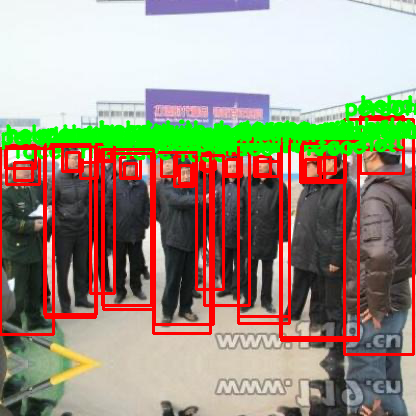

Image 1 done...
--------------------------------------------------


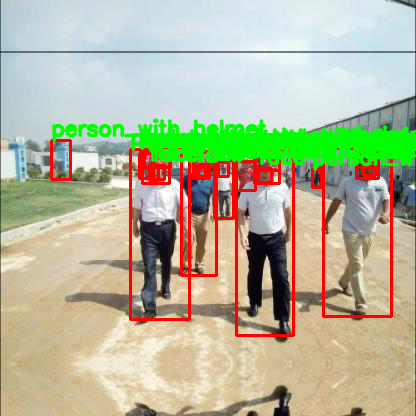

Image 2 done...
--------------------------------------------------
TEST PREDICTIONS COMPLETE


In [30]:
for i in range(len(test_images)):
    # get the image file name for saving output later on
    image_name = test_images[i].split('/')[-1].split('.')[0]
    image = cv2.imread(test_images[i])
    orig_image = image.copy()
    # BGR to RGB
    image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB).astype(np.float32)
    # make the pixel range between 0 and 1
    image /= 255.0
    # bring color channels to front
    image = np.transpose(image, (2, 0, 1)).astype(np.float)
    # convert to tensor
    image = torch.tensor(image, dtype=torch.float).cuda()
    # add batch dimension
    image = torch.unsqueeze(image, 0)
    with torch.no_grad():
        outputs = model(image)
    
    # load all detection to CPU for further operations
    outputs = [{k: v.to('cpu') for k, v in t.items()} for t in outputs]
    # carry further only if there are detected boxes
    if len(outputs[0]['boxes']) != 0:
        boxes = outputs[0]['boxes'].data.numpy()
        scores = outputs[0]['scores'].data.numpy()
        # filter out boxes according to `detection_threshold`
        boxes = boxes[scores >= detection_threshold].astype(np.int32)
        draw_boxes = boxes.copy()
        # get all the predicited class names
        pred_classes = [CLASSES[i] for i in outputs[0]['labels'].cpu().numpy()]
        
        # draw the bounding boxes and write the class name on top of it
        for j, box in enumerate(draw_boxes):
            cv2.rectangle(orig_image,
                        (int(box[0]), int(box[1])),
                        (int(box[2]), int(box[3])),
                        (0, 0, 255), 2)
            cv2.putText(orig_image, pred_classes[j], 
                        (int(box[0]), int(box[1]-5)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 
                        2, lineType=cv2.LINE_AA)

        cv2_imshow( orig_image)
        cv2.waitKey(1)
        cv2.imwrite(f"/content/Eternal_Robotics/test_predictions/{image_name}.jpg", orig_image,)
    print(f"Image {i+1} done...")
    print('-'*50)

print('TEST PREDICTIONS COMPLETE')
cv2.destroyAllWindows()